# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from datetime import date

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#size = 1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 43


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


'\ntest_url = url + "appid=" + weather_api_key + "&q=" + "London"\n#first check for response 200\n#requests.get(test_url)\n\ntest_response = requests.get(test_url)\n\n\ntest_json = test_response.json()\n\n#json_str = json.dumps(test_json, indent = 4)\n#print(json_str)\n\ncity_lat = test_json["coord"]["lat"]\ncity_lng = test_json["coord"]["lon"]\ncity_max_temp = test_json["main"]["temp_max"]\ncity_humidity = test_json["main"]["humidity"]\ncity_clouds = test_json["clouds"]["all"]\ncity_wind = test_json["wind"]["speed"]\ncity_country = test_json["sys"]["country"]\ncity_date = test_json["dt"]\n\nprint("Lat " + str(city_lat))\nprint("Lng " + str(city_lng))\nprint("Max temp " + str(city_max_temp))\nprint("Humidity " + str(city_humidity))\nprint("Clouds " + str(city_clouds))\nprint("Wind " + str(city_wind))\nprint("Country " + str(city_country))\nprint("Date " + str(city_date))\n'

In [19]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | tripoli
Processing Record 5 of Set 1 | bac lieu
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | lakatoro
Processing Record 9 of Set 1 | kissidougou
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | estero
Processing Record 12 of Set 1 | mersa matruh
Processing Record 13 of Set 1 | shahrak
Processing Record 14 of Set 1 | bardai
Processing Record 15 of Set 1 | puerto baquerizo moreno
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | nabire
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | berezovyy
Processing Record 20 of Set 1 | flying fish cove
Processing Record 21 of Set 1 | inari
Processing Record 22 of Set 1 | adamstown
Pr

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          42
Lat           42
Lng           42
Max Temp      42
Humidity      42
Cloudiness    42
Wind Speed    42
Country       42
Date          42
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,265.44,93,100,2.57,CA,1701909699
1,albany,42.6001,-73.9662,271.30,87,66,0.45,US,1701909699
2,port-aux-francais,-49.3500,70.2167,277.88,84,100,8.78,TF,1701909699
3,tripoli,32.8752,13.1875,290.31,50,14,3.48,LY,1701909699
4,bac lieu,9.2850,105.7244,300.21,81,100,7.06,VN,1701909700


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,265.44,93,100,2.57,CA,1701909699
1,albany,42.6001,-73.9662,271.30,87,66,0.45,US,1701909699
2,port-aux-francais,-49.3500,70.2167,277.88,84,100,8.78,TF,1701909699
3,tripoli,32.8752,13.1875,290.31,50,14,3.48,LY,1701909699
4,bac lieu,9.2850,105.7244,300.21,81,100,7.06,VN,1701909700


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

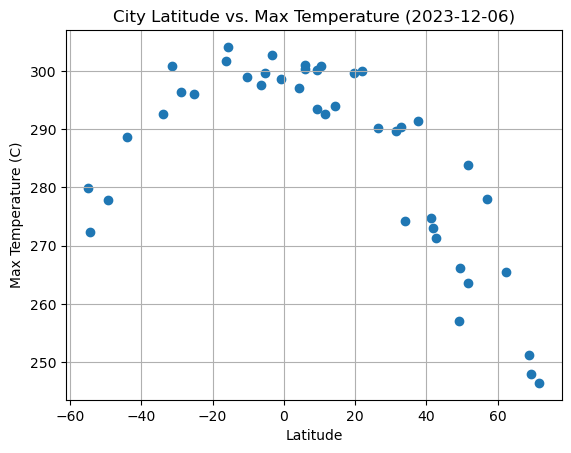

In [52]:
# Build scatter plot for latitude vs. temperature

fig1, ax1 = plt.subplots()
ax1.set_title(f"City Latitude vs. Max Temperature ({date.today()})") #add date
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (C)")

ax1.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
ax1.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

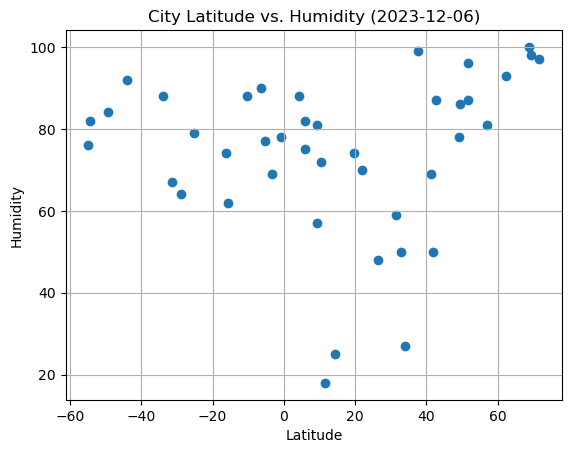

In [53]:
# Build the scatter plots for latitude vs. humidity

# Incorporate the other graph properties
fig2, ax2 = plt.subplots()
ax2.set_title(f"City Latitude vs. Humidity ({date.today()})") #add date
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity")

ax2.scatter(city_data_df["Lat"],city_data_df["Humidity"])
ax2.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

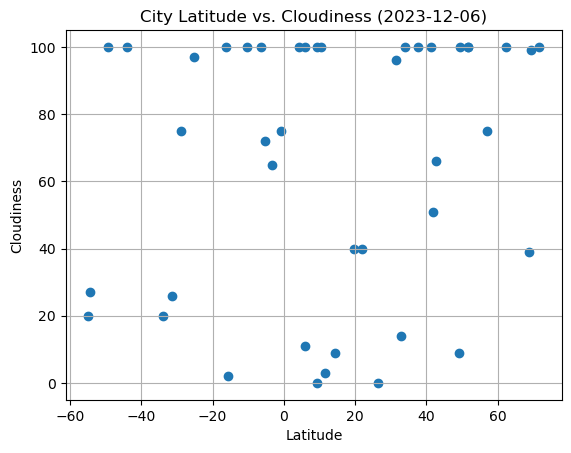

In [57]:
# Build the scatter plots for latitude vs. cloudiness
fig3, ax3 = plt.subplots()
ax3.set_title(f"City Latitude vs. Cloudiness ({date.today()})")
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness")

ax3.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
ax3.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

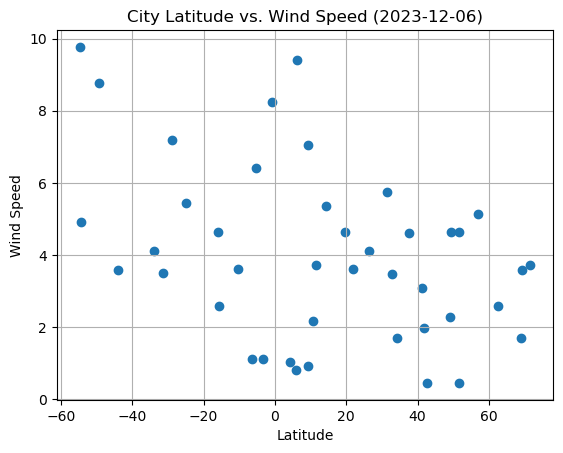

In [58]:
# Build the scatter plots for latitude vs. wind speed
fig4, ax4 = plt.subplots()
ax4.set_title(f"City Latitude vs. Wind Speed ({date.today()})") #add date
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed")

ax4.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
ax4.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [126]:
# Define a function to create Linear Regression plots
def plot_linear_regression(dfXvalues, dfYvalues, xlabel, ylabel):
    # Add the linear regression equation and line to plot
    x_values = dfXvalues 
    y_values = dfYvalues 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig0, ax0 = plt.subplots()
    
    ax0.set_xlabel(xlabel)
    ax0.set_ylabel(ylabel)
    ax0.annotate(line_eq, xy=(min(dfXvalues), min(dfYvalues)), xytext = (20, 20), textcoords = "offset points", fontsize=15,color="red")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")


    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,265.44,93,100,2.57,CA,1701909699
1,albany,42.6001,-73.9662,271.30,87,66,0.45,US,1701909699
3,tripoli,32.8752,13.1875,290.31,50,14,3.48,LY,1701909699
4,bac lieu,9.2850,105.7244,300.21,81,100,7.06,VN,1701909700
8,kissidougou,9.1848,-10.0999,293.48,57,0,0.93,GN,1701909700


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,277.88,84,100,8.78,TF,1701909699
5,touros,-5.1989,-35.4608,299.71,77,72,6.40,BR,1701909700
6,waitangi,-43.9535,-176.5597,288.61,92,100,3.58,NZ,1701909700
7,lakatoro,-16.0999,167.4164,301.65,74,100,4.64,VU,1701909700
14,puerto baquerizo moreno,-0.9000,-89.6000,298.70,78,75,8.23,EC,1701909701


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8253413512445353


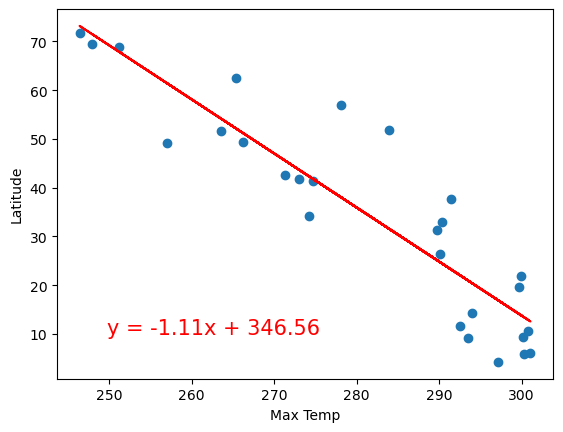

In [127]:
# Linear regression on Northern Hemisphere
#left mid
plot_linear_regression(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"], "Max Temp", "Latitude")

The r-squared is: 0.7353374569444259


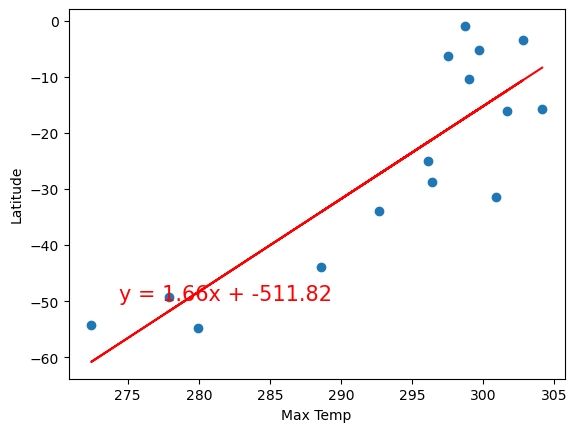

In [128]:
# Linear regression on Southern Hemisphere
#left top
plot_linear_regression(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"], "Max Temp", "Latitude")

**Discussion about the linear relationship:** There is a correlation between latitude and longitude on max temp, with max temps increasing the as the latitude is closer to zero (equator)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


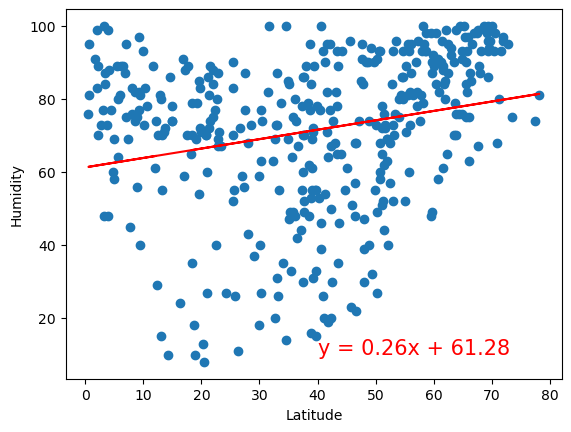

In [17]:
# Northern Hemisphere
#annotation is right lower
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is: 0.0002808747046324607


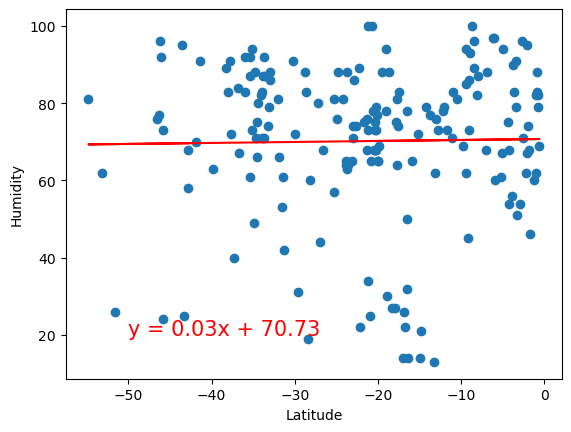

In [18]:
# Southern Hemisphere
#annotation is left lower
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** There is not a strong correlation between humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


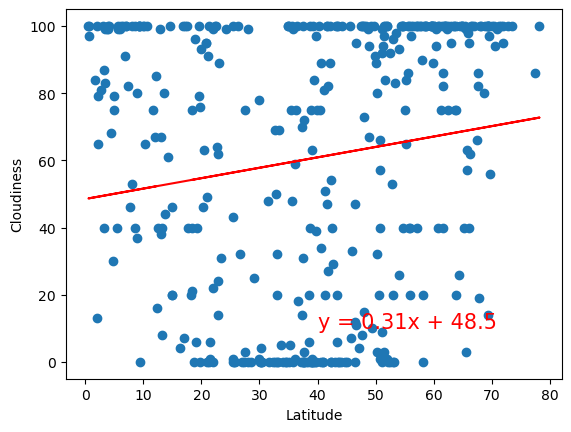

In [19]:
# Northern Hemisphere
#annotation is right lower
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is: 0.02056735429994368


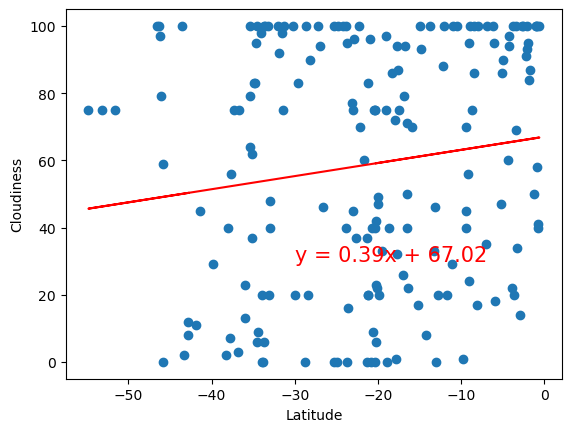

In [20]:
# Southern Hemisphere
#annotation is right mid/lower
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** There does not appear to be a strong correlation between latitude on cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


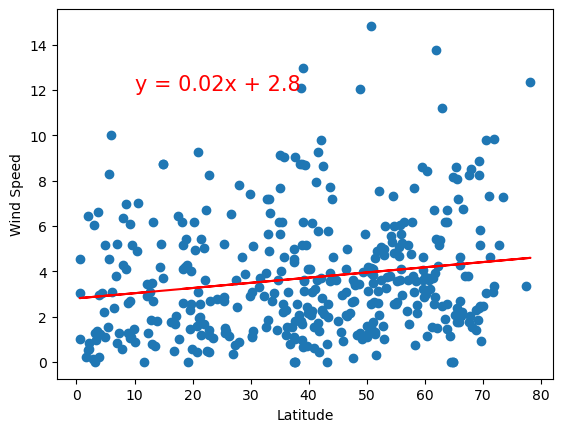

In [21]:
# Northern Hemisphere
#annotation is left topish
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is: 0.062239040700515696


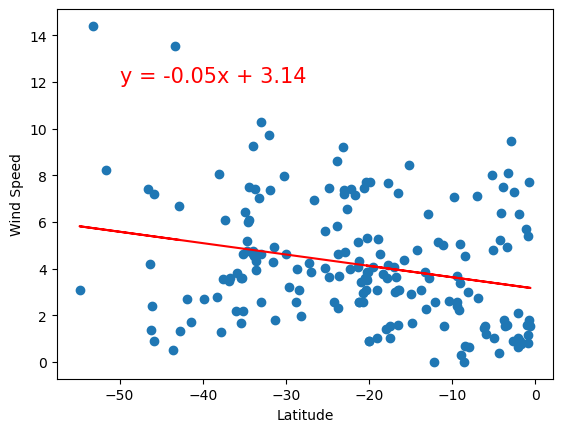

In [22]:
# Southern Hemisphere
#annotation is left top
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** There is not a strong correclation between latitude and wind speed